In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

In [88]:
def A(n):
    A=2*np.eye(n)-np.diag(np.ones(n-1),1)-np.diag(np.ones(n-1),-1)
    return(A*(n+1)**2)

In [89]:
def J(u,fx):
    n=np.size(u)
    A=(n+1)**2*(2*np.eye(n)-np.diag(np.ones(n-1),1)-np.diag(np.ones(n-1),-1))
    J=(0.5)*np.dot((A@u),u)-np.dot(fx,u)
    return J

In [90]:
def DJ(U,fx):
    n=np.size(U)
    A1=A(n)
    return (np.dot(A1,U)-fx)

In [91]:
DJ(np.ones(2),np.ones(2))

array([8., 8.])

In [92]:
def f(x):
    return np.ones(np.size(x))
def g(x):
    v=1.5-20*(x-0.6)**2
    v[v<0]=0
    return v

In [93]:
n = 100
x = np.linspace (0,1,n + 2)
g(x)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00649936, 0.11276345,
       0.21510636, 0.31352809, 0.40802862, 0.49860798, 0.58526615,
       0.66800314, 0.74681894, 0.82171356, 0.89268699, 0.95973924,
       1.02287031, 1.08208019, 1.13736889, 1.1887364 , 1.23618273,
       1.27970787, 1.31931183, 1.35499461, 1.3867562 , 1.41459661,
       1.43851583, 1.45851387, 1.47459073, 1.4867464 , 1.49498088,
       1.49929419, 1.49968631, 1.49615724, 1.48870699, 1.47733556,
       1.46204294, 1.44282913, 1.41969415, 1.39263798, 1.36166062,
       1.32676208, 1.28794236, 1.24520145, 1.19853936, 1.14795

In [94]:
n = 100
x = np.linspace (0 , 1 , n + 2)
xv = x [1: - 1]
fv , gv = f ( xv ) , g ( xv )
Jf = lambda u : J (u , fv )
DJf = lambda u : DJ (u , fv )
const = ({ 'type': 'ineq', 'fun' : lambda u : u-gv ,'jac': lambda u : np.eye (np.size (u) ) })
u = np.zeros(n)
res = minimize(Jf,u,method ='SLSQP', jac=DJf ,constraints=const ,tol=1e-8 , options= {'disp':True , 'maxiter': 5000})

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 425.0036617613788
            Iterations: 214
            Function evaluations: 998
            Gradient evaluations: 210


In [95]:
res.x

array([0.02880163, 0.05750522, 0.08611079, 0.11461833, 0.14302784,
       0.17133932, 0.19955277, 0.2276682 , 0.25568559, 0.28360496,
       0.3114263 , 0.33914961, 0.36677489, 0.39430214, 0.42173136,
       0.44906255, 0.47629571, 0.50343085, 0.53046795, 0.55740702,
       0.58424807, 0.61099108, 0.63763606, 0.66418301, 0.69063194,
       0.71698283, 0.74323569, 0.76939052, 0.79544733, 0.8214061 ,
       0.84726684, 0.87302956, 0.89869424, 0.9242609 , 0.94972952,
       0.97510012, 1.00037268, 1.02554722, 1.05062372, 1.0756022 ,
       1.10048265, 1.12526507, 1.14994945, 1.17453581, 1.19902414,
       1.22341444, 1.24770671, 1.27190095, 1.29599715, 1.31999533,
       1.34389547, 1.36769759, 1.39140168, 1.41500774, 1.43851576,
       1.4585138 , 1.47459066, 1.48674633, 1.49498082, 1.49929412,
       1.49968624, 1.49615717, 1.48870693, 1.47733549, 1.46204286,
       1.44282906, 1.41969408, 1.39263791, 1.36166056, 1.32676203,
       1.28794231, 1.24643232, 1.20482431, 1.16311827, 1.12131

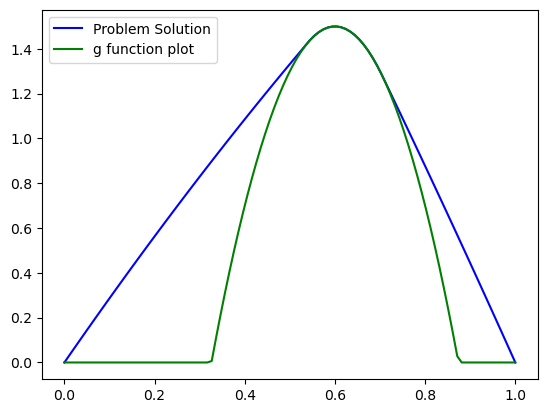

In [96]:
r=[0]
for i in res.x:
    r.append(i)
r.append(0)
plt.plot(x,r,color='blue',label='Problem Solution')
plt.plot(x,g(x),color='green',label='g function plot')
plt.legend()

For n= 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 45.288340220388775
            Iterations: 19
            Function evaluations: 38
            Gradient evaluations: 19


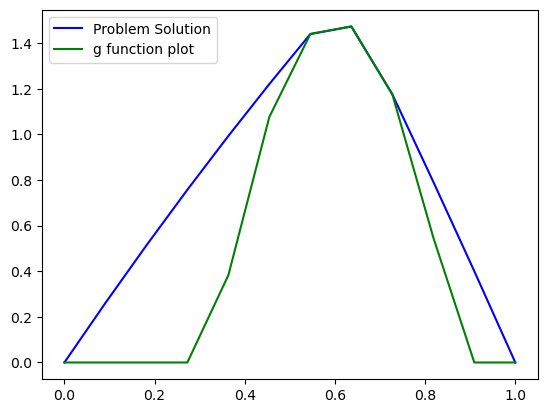

In [58]:

n = 10
print("For n=",n)
x = np.linspace (0 , 1 , n + 2)
xv = x [1: - 1]
fv , gv = f ( xv ) , g ( xv )
Jf = lambda u : J (u , fv )
DJf = lambda u : DJ (u , fv )
const = ({ 'type': 'ineq', 'fun' : lambda u : u-gv ,'jac': lambda u : np.eye (np.size (u) ) })
u = np.zeros(n)
res_10 = minimize(Jf,u,method ='SLSQP', jac=DJf ,constraints=const ,tol=1e-8 , options= {'disp':True , 'maxiter': 5000})
r=[0]
for i in res_10.x:
    r.append(i)
r.append(0)
plt.plot(x,r,color='blue',label='Problem Solution')
plt.plot(x,g(x),color='green',label='g function plot')
plt.legend()

For n= 20
Optimization terminated successfully    (Exit mode 0)
            Current function value: 87.84599618885562
            Iterations: 30
            Function evaluations: 82
            Gradient evaluations: 30


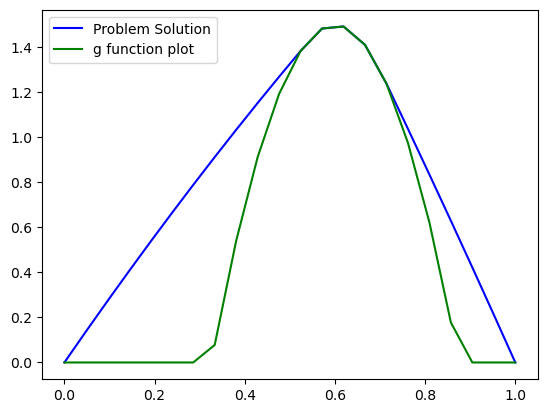

In [59]:

n = 20
print("For n=",n)
x = np.linspace (0 , 1 , n + 2)
xv = x [1: - 1]
fv , gv = f ( xv ) , g ( xv )
Jf = lambda u : J (u , fv )
DJf = lambda u : DJ (u , fv )
const = ({ 'type': 'ineq', 'fun' : lambda u : u-gv ,'jac': lambda u : np.eye (np.size (u) ) })
u = np.zeros(n)
res_10 = minimize(Jf,u,method ='SLSQP', jac=DJf ,constraints=const ,tol=1e-8 , options= {'disp':True , 'maxiter': 5000})
r=[0]
for i in res_10.x:
    r.append(i)
r.append(0)
plt.plot(x,r,color='blue',label='Problem Solution')
plt.plot(x,g(x),color='green',label='g function plot')
plt.legend()

For n= 100
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 425.0036617613788
            Iterations: 214
            Function evaluations: 998
            Gradient evaluations: 210


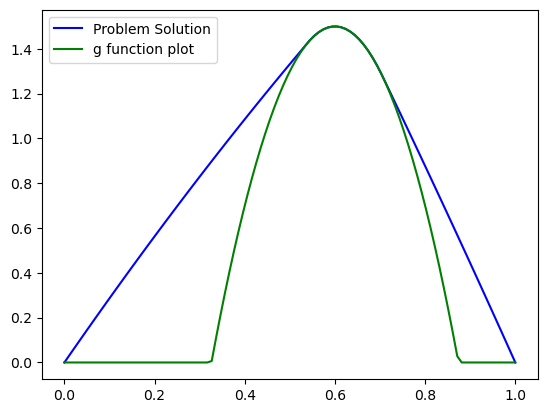

In [60]:

n = 100
print("For n=",n)
x = np.linspace (0 , 1 , n + 2)
xv = x [1: - 1]
fv , gv = f ( xv ) , g ( xv )
Jf = lambda u : J (u , fv )
DJf = lambda u : DJ (u , fv )
const = ({ 'type': 'ineq', 'fun' : lambda u : u-gv ,'jac': lambda u : np.eye (np.size (u) ) })
u = np.zeros(n)
res_10 = minimize(Jf,u,method ='SLSQP', jac=DJf ,constraints=const ,tol=1e-8 , options= {'disp':True , 'maxiter': 5000})
r=[0]
for i in res_10.x:
    r.append(i)
r.append(0)
plt.plot(x,r,color='blue',label='Problem Solution')
plt.plot(x,g(x),color='green',label='g function plot')
plt.legend()